In [4]:
#importing Python Modules
#pandas for reading in file and numpy for some basic manipulation
import pandas as pd
import numpy as np

reading the dataset

In [11]:
df = pd.read_csv("depression_dataset_reddit_cleaned.csv")  
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


lets check the count of depression

In [8]:

df['is_depression'].value_counts()   

0    3900
1    3831
Name: is_depression, dtype: int64

lets check for null values

In [9]:

df.isnull().sum()  

clean_text       0
is_depression    0
dtype: int64

importing pacakages
<br>NLTK for NLP
<br>re for regec package and some basic pre processing
<br>#import stopwords package , stopwords are like ex a,the, is
<br>#lemmatizer used to convert to root words, ex leaves = leaf
<br>#Tokenizers divide strings into lists of substrings


In [12]:
import nltk  
import re  
import string 
from nltk.corpus import stopwords  
nltk.download("stopwords") 

nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer  
nltk.download("wordnet") 
lemmatize=WordNetLemmatizer() #It is to take roots of the words

stopword=set(stopwords.words('english'))

from nltk.tokenize import word_tokenize  
nltk.download('punkt')  #this is the tokenizer we are using

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CKitc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CKitc\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CKitc\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CKitc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

a function to remove punctuation, numbers, links , symbols, stopwordsa and to lemmatize and then finnaly to join

In [13]:
def clean(text):
    text = str(text).lower()
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)   #remove punctuation , numbers, links , synmbols
    text = re.sub('\n', '', text) #replacing new line with ''
    text = [word for word in text.split(' ') if word not in stopword]  #removing stop words
    text=" ".join(text)  #joining text for lemmatization
    text = [lemmatize.lemmatize(word) for word in text.split(' ')]  #lemmatizing words
    text=" ".join(text) #again joining text for easy tokenization
    return text

def tokenize(d):
  return word_tokenize(d)

    

In [14]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


#applying pre processing 

In [15]:
df['clean_text']=df['clean_text'].apply(clean) 

#lets check for duplicate values

In [16]:

df.duplicated().sum()

105

#seems like few rows are duplicates lets remove them

In [17]:


df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1
...,...,...
7726,snow,0
7727,moulin rouge mad cry,0
7728,trying shout find people list,0
7729,ughh find red sox hat got ta wear creepy nick ...,0


#to see most repeated word in depressed message

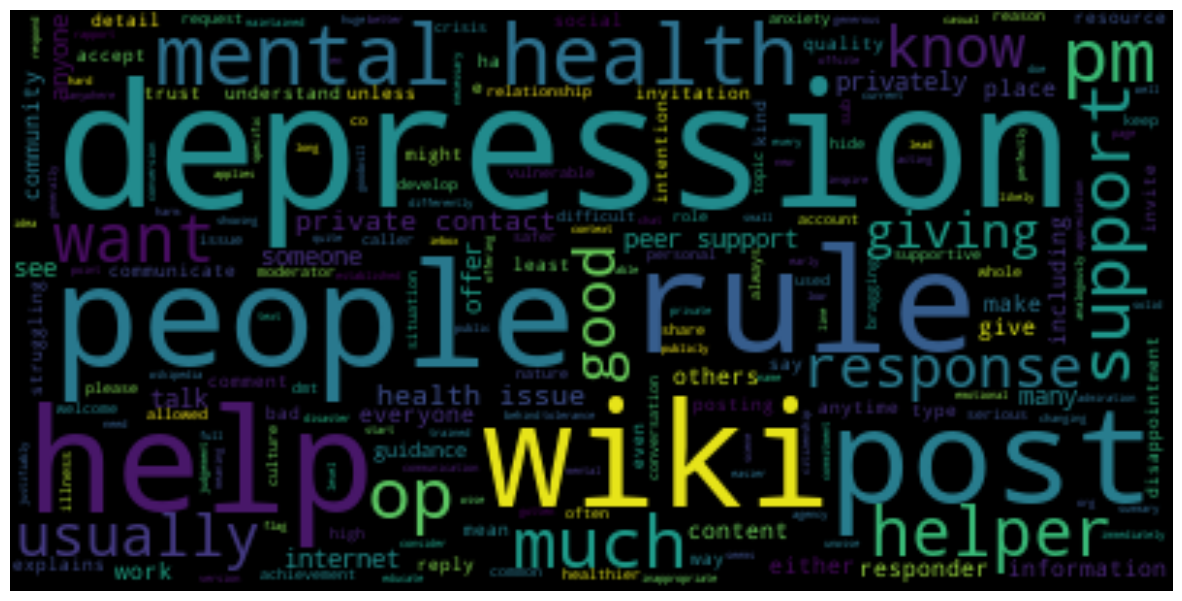

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

depressed=str(df[df['is_depression']==1]['clean_text'].values)

wordcloud = WordCloud().generate(depressed)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

#to see most repeated word in non-depressed message

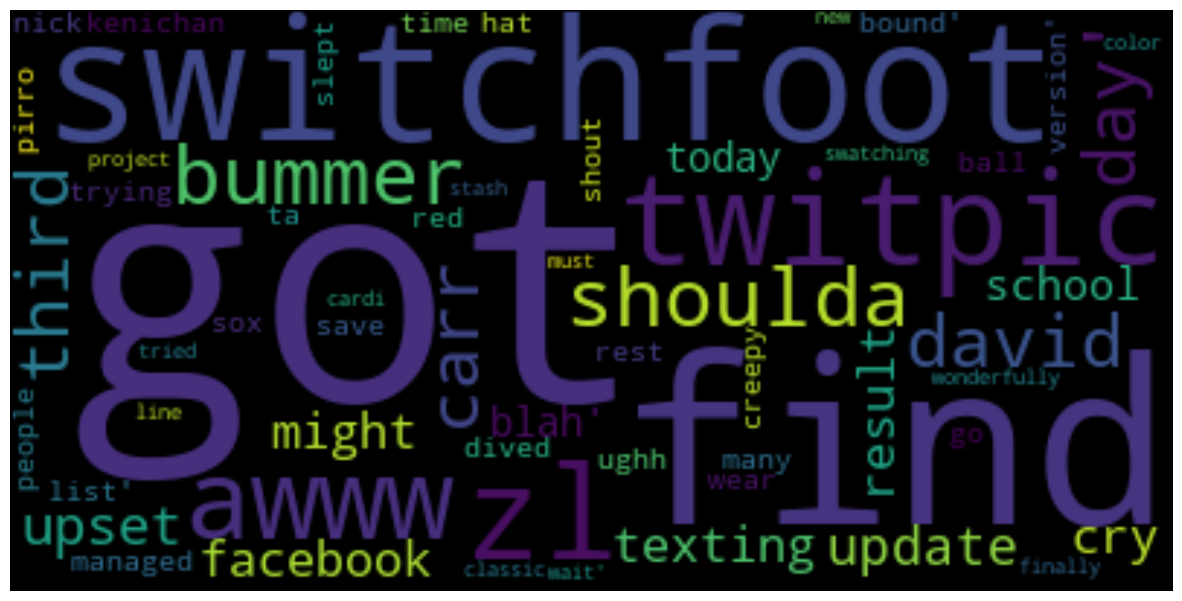

In [21]:



not_depressed=str(df[df['is_depression']==0]['clean_text'].values)

wordcloud = WordCloud().generate(not_depressed)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

In [22]:

from nltk.probability import FreqDist  #easy built in function to calculate frequencies of the word
fdist=FreqDist(word_tokenize(depressed))
fdist.most_common(10)  #most common words in depression post

[('depression', 13),
 ('support', 10),
 ('people', 9),
 ('help', 9),
 ('rule', 9),
 ('mental', 9),
 ('wiki', 8),
 ('r', 8),
 ('health', 8),
 ('post', 8)]

#lets find the frequency of words for depression

In [23]:
fdist=FreqDist(word_tokenize(not_depressed))
fdist.most_common(10)  #most common words in not-depression post  

[('got', 2),
 ("'", 2),
 ('find', 2),
 ('[', 1),
 ("'switchfoot", 1),
 ('twitpic', 1),
 ('com', 1),
 ('zl', 1),
 ('awww', 1),
 ('bummer', 1)]

#n-gram = most commonly used n group of words
#bi-gram -> 2 words commonly used together
#tri-gram -> 2 words commonly used together

In [ ]:
#n-gram = most commonly used n group of words

In [24]:
from nltk import ngrams #for easily selectig n-grams
#use 2 for bigrams
bigrams = ngrams(word_tokenize(depressed),2)
print(list(bigrams)[:10]) 
 
#use 3 for trigrams
trigrams = ngrams(word_tokenize(depressed),3)
print(list(trigrams)[:10]) 

[('[', "'understand"), ("'understand", 'people'), ('people', 'reply'), ('reply', 'immediately'), ('immediately', 'op'), ('op', 'invitation'), ('invitation', 'talk'), ('talk', 'privately'), ('privately', 'mean'), ('mean', 'help')]
[('[', "'understand", 'people'), ("'understand", 'people', 'reply'), ('people', 'reply', 'immediately'), ('reply', 'immediately', 'op'), ('immediately', 'op', 'invitation'), ('op', 'invitation', 'talk'), ('invitation', 'talk', 'privately'), ('talk', 'privately', 'mean'), ('privately', 'mean', 'help'), ('mean', 'help', 'type')]


In [25]:
#use 2 for bigrams
bigrams = ngrams(word_tokenize(not_depressed),2)
print(list(bigrams)[:10]) 
 
#use 3 for trigrams
trigrams = ngrams(word_tokenize(not_depressed),3)
print(list(trigrams)[:10]) 

[('[', "'switchfoot"), ("'switchfoot", 'twitpic'), ('twitpic', 'com'), ('com', 'zl'), ('zl', 'awww'), ('awww', 'bummer'), ('bummer', 'shoulda'), ('shoulda', 'got'), ('got', 'david'), ('david', 'carr')]
[('[', "'switchfoot", 'twitpic'), ("'switchfoot", 'twitpic', 'com'), ('twitpic', 'com', 'zl'), ('com', 'zl', 'awww'), ('zl', 'awww', 'bummer'), ('awww', 'bummer', 'shoulda'), ('bummer', 'shoulda', 'got'), ('shoulda', 'got', 'david'), ('got', 'david', 'carr'), ('david', 'carr', 'third')]


In [26]:
df

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1
...,...,...
7726,snow,0
7727,moulin rouge mad cry,0
7728,trying shout find people list,0
7729,ughh find red sox hat got ta wear creepy nick ...,0


In [27]:
df['clean_text']=df['clean_text'].apply(tokenize)  #tokenizing them for better understanding

In [28]:
df.reset_index(drop=True,inplace=True)

In [29]:
df

,clean_text,is_depression
0,"[understand, people, reply, immediately, op, i...",1
1,"[welcome, r, depression, check, post, place, t...",1
2,"[anyone, else, instead, sleeping, depressed, s...",1
3,"[kind, stuffed, around, lot, life, delaying, i...",1
4,"[sleep, greatest, comforting, escape, whenever...",1
...,...,...
7621,[snow],0
7622,"[moulin, rouge, mad, cry]",0
7623,"[trying, shout, find, people, list]",0
7624,"[ughh, find, red, sox, hat, got, ta, wear, cre...",0


In [30]:
df['clean_text'] = df['clean_text'].apply(lambda x: ', '.join([str(i) for i in x]))

In [31]:
df

,clean_text,is_depression
0,"understand, people, reply, immediately, op, in...",1
1,"welcome, r, depression, check, post, place, ta...",1
2,"anyone, else, instead, sleeping, depressed, st...",1
3,"kind, stuffed, around, lot, life, delaying, in...",1
4,"sleep, greatest, comforting, escape, whenever,...",1
...,...,...
7621,snow,0
7622,"moulin, rouge, mad, cry",0
7623,"trying, shout, find, people, list",0
7624,"ughh, find, red, sox, hat, got, ta, wear, cree...",0


#shuffling the dataset so that splitting dataset becomes easy

In [32]:
df = df.sample(frac=1).reset_index(drop=True)

In [33]:
df

,clean_text,is_depression
0,"leave, abusive, relationship, still, keep, cat...",1
1,"sub, probably, well, 9, depressed, since, wa, ...",1
2,"alessandrod, sadness, please, keep, updating, hug",0
3,"wa, work, today, suddenly, felt, really, reall...",1
4,"basically, earlier, took, hit, old, roach, guy...",1
...,...,...
7621,"try, keep, short, possible, past, year, strugg...",1
7622,"pizza, night, feel, sick",0
7623,"forgot, sleep",0
7624,"actinglikeamama, oh, recipe, gyro, developed, ...",0


In [34]:
#placing texts in X and target in Y
X=df['clean_text']
y=df['is_depression']

### Convert a collection of text documents to a matrix of token counts  
Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. t is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis)


In [35]:
#lets create a bag of words model
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts.

cv = CountVectorizer()

# X contains corpus (dependent variable)
X_c = cv.fit_transform(X) #fit_tranform so it learns all the words

In [36]:
from sklearn.model_selection import train_test_split #for splitting dataset into train and test set
from sklearn.svm import SVC  #importing SVM
from sklearn.metrics import accuracy_score  # importing accuracy score as metric

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_c,y,random_state=30,test_size=0.2) #splitting dataset into train and test

In [38]:
SVM=SVC()  #creating default instance
SVM.fit(X_train,y_train)

SVC()

In [39]:
print(accuracy_score(SVM.predict(X_test),y_test))

0.9528178243774574


# now some hyper parameter tuning to get the best model
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [40]:
"""
#now some hyper parameter tuning to get the best model
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
"""

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.968 total time=   1.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.964 total time=   1.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   1.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=   1.4s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.958 total time=   1.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.923 total time=   5.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

In [ ]:
#best parameter after tuning
#print(grid.best_params_)

In [ ]:
SVM=SVC(C= 10, gamma= 0.01, kernel= 'rbf')
SVM.fit(X_train,y_train)

SVC(C=10, gamma=0.01)

In [ ]:

y_pred=SVM.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9587155963302753


In [ ]:
from sklearn.metrics import confusion_matrix  #to plot confusion matrix
print(confusion_matrix(y_test,y_pred))

[[713   5]
 [ 58 750]]


so here 754 were correctly predictes as postive and were postive and 714 were correctly predicted as negative and were negative



But 53 is predicted as not_depressed when they were depressed
and 5 were predicted as depressed when they were not _depressed

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_tf,y,random_state=30,test_size=0.2)

In [ ]:
SVM=SVC()
SVM.fit(X_train,y_train)

In [ ]:
print(accuracy_score(SVM.predict(X_test),y_test))

# now some hyper parameter tuning to get the best model
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

In [ ]:
SVM=SVC(C= 1, gamma= 1, kernel= 'linear')
SVM.fit(X_train,y_train)

In [ ]:
print(accuracy_score(SVM.predict(X_test),y_test))

In [ ]:
def get_sentiment(text):
  text_d=pd.Series(text)
  text_d=text_d.apply(clean).apply(tokenize)
  text_d = text_d.apply(lambda x: ', '.join([str(i) for i in x]))
  
  X_cv=cv.transform(text_d)
  y_pred=SVM.predict(X_cv)
  if(y_pred==0):
    print("not depressed")
  elif(y_pred==1):
    print("depressed")

In [ ]:
get_sentiment("i am ok and cool")

not depressed


In [ ]:
get_sentiment("It boggles my mind. I guess everybody is different and all have their unique characteristic but depression has the exact OPPOSITE everyone experience it the same way")

depressed


In [ ]:
def enter():
  print("hey how are you doing today")
  text=str(input())
  get_sentiment(text)

In [ ]:
enter()

hey how are you doing today


KeyboardInterrupt: ignored